In [94]:
from utils.analyse_runs import *
from utils.analyse_training import *

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dtype=torch.float64

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DF of all runs sorted by best_avg_loss

In [95]:
df = load_runs_table("./runs")
df.head()

,run_id,best_avg_loss,best_epoch,epoch,lr_drops_used,kernel_mode,kernel_spec,esn_h,esn_m,esn_out_dim,...,target_T,target_p,target_q,target_phi,target_theta,target_omega,target_alpha,target_beta,target_noise_spec,run_path
0,esn_vs_ARMA_RBFKernel_20260223_190425_cpu,-0.001877,291,541,3,static,RBFKernel(sigma=27.208157883254998),500,20,1,...,200,2,0,"[0.699999988079071, -0.20000000298023224]",[],None,None,None,"{'kind': 'normal', 'params': {}}",runs/esn_vs_ARMA_RBFKernel_20260223_190425_cpu
1,esn_vs_ARMA_RBFKernel_20260223_184808_cpu,-0.001375,689,939,3,static,RBFKernel(sigma=28.073606052131726),500,20,1,...,200,2,0,"[0.699999988079071, -0.20000000298023224]",[],None,None,None,"{'kind': None, 'params': None}",runs/esn_vs_ARMA_RBFKernel_20260223_184808_cpu
2,esn_vs_ARMA_RBFKernel_20260223_192023_cpu,-0.000645,166,416,3,static,RBFKernel(sigma=27.40222087730997),500,20,1,...,200,2,0,"[0.699999988079071, -0.20000000298023224]",[],None,None,None,"{'kind': 't', 'params': {}}",runs/esn_vs_ARMA_RBFKernel_20260223_192023_cpu


# Pick one row and show loss progression and plot some samples

In [96]:
row = 0

## loss progrssion for this particular run

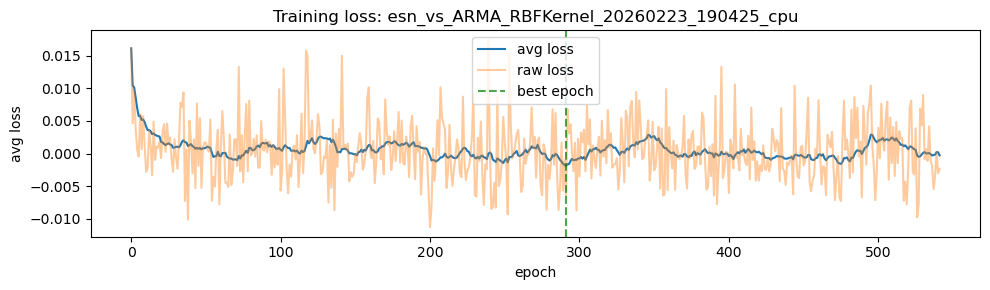

Kernel spec: RBFKernel(sigma=27.208157883254998)
Best average loss: -0.0019 at epoch 291
Final average loss: -0.0003
Final loss: -0.0023


In [97]:
results = df.iloc[row]
losses = plot_loss_from_run(results, None, overlay_raw=True, log_scale=False, overlay_lr = True, mark_best_and_drops=True)
print(f"Kernel spec: {results['kernel_spec']}")
print(f"Best average loss: {results['best_avg_loss']:.4f} at epoch {results['best_epoch']}")
print(f"Final average loss: {losses['avg_losses'][-1]:.4f}")
print(f"Final loss: {losses['losses'][-1]:.4f}")

## load and plot samples for this particular run

### ESN

In [98]:
esn_cols = [col for col in df.columns if "esn_" in col]
df.iloc[row][esn_cols]

esn_h              500
esn_m               20
esn_out_dim          1
esn_activation    tanh
esn_xi_scale       1.0
esn_eta_scale     0.05
esn_target_rho     0.9
Name: 0, dtype: object

In [99]:
esn = load_esn_from_df(df, row=row, which="best", map_location=device, dtype=torch.float64)
# with torch.no_grad():
#     Z = esn(T=200, N=50)
# print(Z.shape)

### Generator

In [100]:
target_cols = [col for col in df.columns if "target_" in col]   
df.iloc[row][target_cols]

esn_target_rho                                             0.9
target_name                                               ARMA
target_T                                                   200
target_p                                                     2
target_q                                                     0
target_phi           [0.699999988079071, -0.20000000298023224]
target_theta                                                []
target_omega                                              None
target_alpha                                              None
target_beta                                               None
target_noise_spec             {'kind': 'normal', 'params': {}}
Name: 0, dtype: object

In [101]:
generator, noise = load_target_and_noise_from_df(df, row=row)
# with torch.no_grad():
#     Z_target = generator.generate(N=50, T=1000, noise=noise)
# print(Z_target.shape)

# ACF analysis

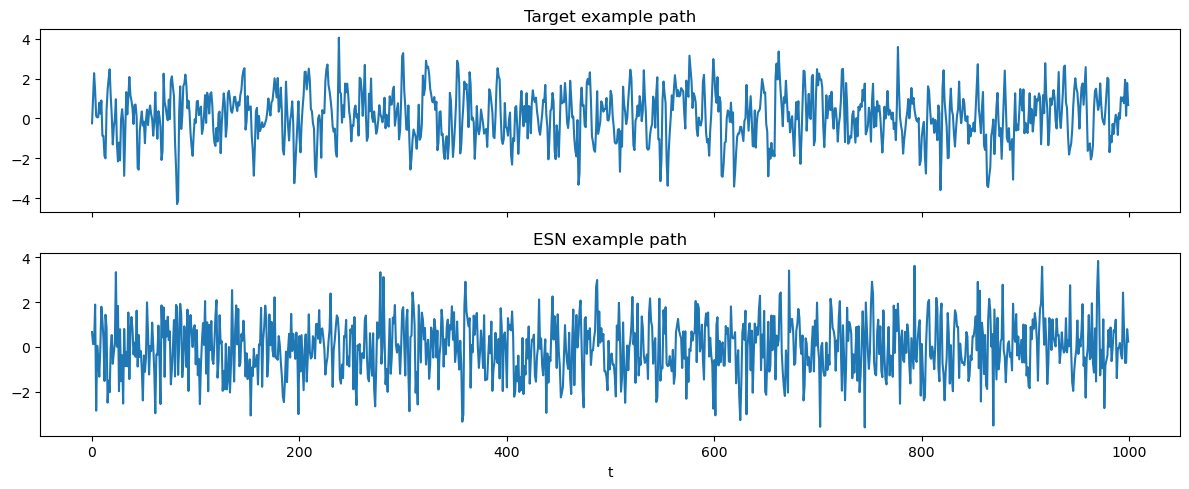

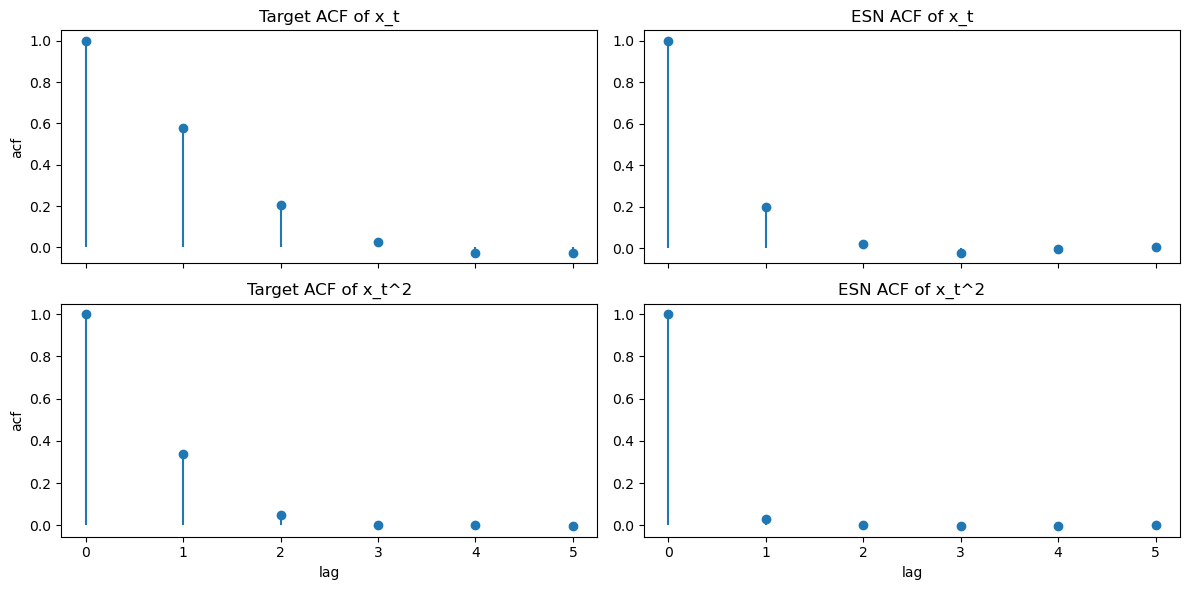

In [102]:
out = acf_compare(esn=esn, generator=generator, N=100, T=1000, lag=5, noise=noise)